In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet


import requests
import json
from pandas.io.json import json_normalize 
import seaborn as sns

In [14]:
#urls
d = dict([("BTC_2h_url", 25)])
BTC_2h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=2&e=CCCAGG'
BTC_6h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=6&e=CCCAGG'
BTC_12h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=12&e=CCCAGG'
BTC_24h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=24&e=CCCAGG'


In [15]:
#requests

BTC_2h_response = requests.get(BTC_2h_url)
BTC_6h_response = requests.get(BTC_6h_url)
BTC_12h_response = requests.get(BTC_12h_url)
BTC_24h_response = requests.get(BTC_24h_url)


if (BTC_2h_response.status_code == 200):
    BTC_2h = (BTC_2h_response.json())
    BTC_2h = json_normalize(BTC_2h['Data'])
    BTC_2h['time'] = pd.to_datetime(BTC_2h['time'], unit='s')
    BTC_2h_noIdenx = BTC_2h.set_index('time')
if (BTC_6h_response.status_code == 200):
    BTC_6h = (BTC_6h_response.json())
    BTC_6h = (BTC_6h_response.json())
    BTC_6h = json_normalize(BTC_6h['Data'])
    BTC_6h['time'] = pd.to_datetime(BTC_6h['time'], unit='s')
if (BTC_12h_response.status_code == 200):
    BTC_12h = (BTC_12h_response.json())
    BTC_12h = (BTC_12h_response.json())
    BTC_12h = json_normalize(BTC_12h['Data'])
    BTC_12h['time'] = pd.to_datetime(BTC_12h['time'], unit='s')
if (BTC_24h_response.status_code == 200):
    BTC_24h = (BTC_24h_response.json())
    BTC_24h = (BTC_24h_response.json())
    BTC_24h = (BTC_24h_response.json())
    BTC_24h = json_normalize(BTC_24h['Data'])
    BTC_24h['time'] = pd.to_datetime(BTC_24h['time'], unit='s')


In [16]:
BTC_12h.head(1)

,close,high,low,open,time,volumefrom,volumeto
0,9837.86,11417.84,8938.7,10836.45,2017-11-29 12:00:00,139590.31,1.442467e+09


In [17]:
btc_intervals = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]
first_dates = []
last_dates = []
for df in range(len(btc_intervals)):
    last = len(btc_intervals[df]) - 1
    first_dates.append(btc_intervals[df]['time'].iloc[0])
    last_dates.append(btc_intervals[df]['time'].iloc[last])

#NEED to iterate over everything else


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


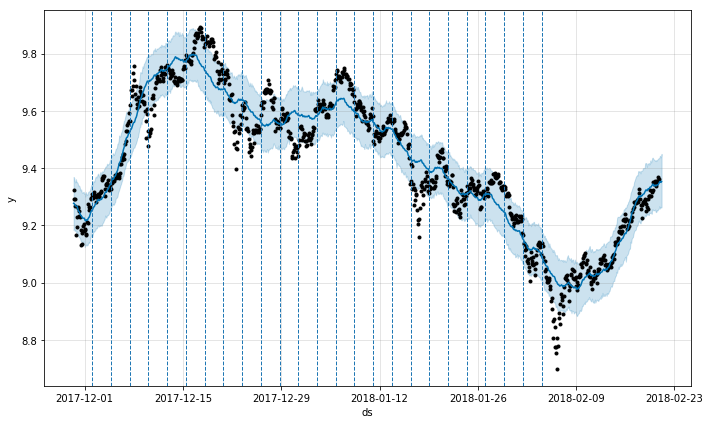

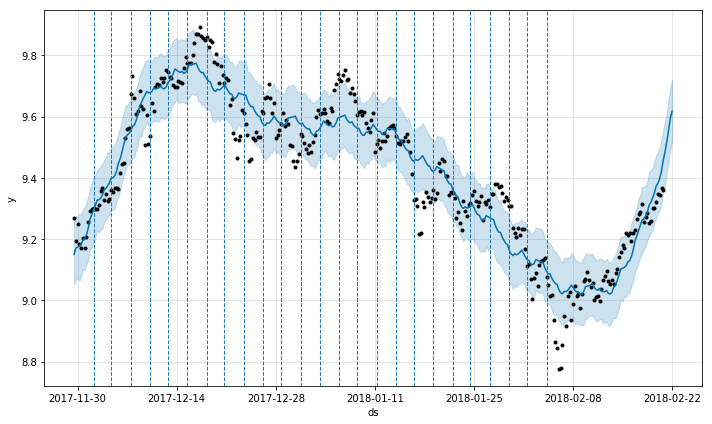

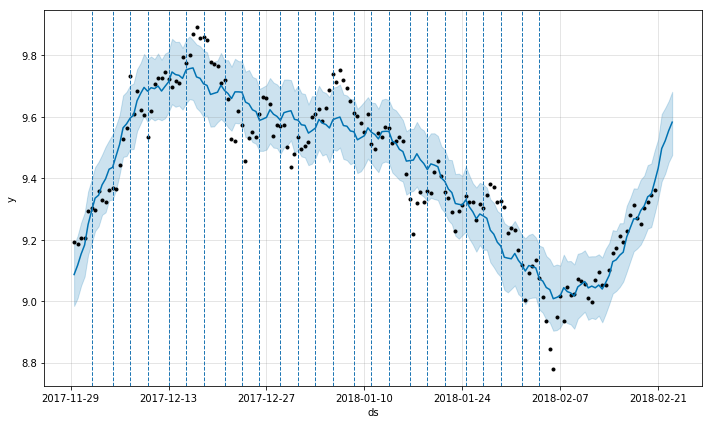

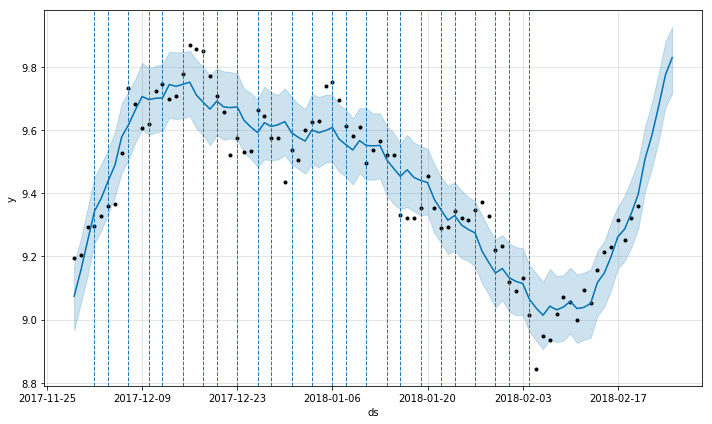

In [18]:
btc_intervals = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]
btc_timeperiods = ['2h', '6h', '12h', '24h']
def changeToProphet(df):
    df = df[['close', 'time']]
    df = df.rename(columns={'close': 'y', 'time': 'ds'})
    df['y'] = np.log(df['y'])
    return df

def runProphetPrediction(df, periods, scale, frequency):
    m = Prophet(changepoint_prior_scale=scale, yearly_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=periods, freq=frequency)
    forecast = m.predict(future)
    #This is causing issues for soe reason. Or maybe its right. It is plotting the lines at different levels
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    m.plot(forecast)
    for changepoint in m.changepoints:
        plt.axvline(changepoint,ls='--', lw=1)


    
for i in range(len(btc_intervals)):
    btc_intervals[i] = changeToProphet(btc_intervals[i])
    runProphetPrediction(btc_intervals[i], 5, 0.005, btc_timeperiods[i])
    


In [19]:
def runSingleProphetPredictionData(df, periods, scale, frequency):
    m = Prophet(changepoint_prior_scale=scale, yearly_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=periods, freq=frequency)
    forecast = m.predict(future)
    #forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    return forecast

runSingleProphetPredictionData(btc_intervals[0], 5, 0.005, btc_timeperiods[0])


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2017-11-29 10:00:00,9.996874,9.996874,9.996874,9.192076,9.365334,-0.002829,-0.002829,-0.002829,-0.719892,...,-0.719892,-0.719892,-0.719892,-0.008318,-0.008318,-0.008318,-0.708744,-0.708744,-0.708744,9.276982
1,2017-11-29 12:00:00,9.995624,9.995624,9.995624,9.190023,9.365076,-0.000227,-0.000227,-0.000227,-0.719360,...,-0.719360,-0.719360,-0.719360,-0.006159,-0.006159,-0.006159,-0.712974,-0.712974,-0.712974,9.276264
2,2017-11-29 14:00:00,9.994375,9.994375,9.994375,9.181096,9.357290,-0.001097,-0.001097,-0.001097,-0.722146,...,-0.722146,-0.722146,-0.722146,-0.004136,-0.004136,-0.004136,-0.716913,-0.716913,-0.716913,9.272228
3,2017-11-29 16:00:00,9.993126,9.993126,9.993126,9.181810,9.355327,-0.001840,-0.001840,-0.001840,-0.724737,...,-0.724737,-0.724737,-0.724737,-0.002332,-0.002332,-0.002332,-0.720565,-0.720565,-0.720565,9.268389
4,2017-11-29 18:00:00,9.991876,9.991876,9.991876,9.175293,9.354491,0.000354,0.000354,0.000354,-0.724396,...,-0.724396,-0.724396,-0.724396,-0.000815,-0.000815,-0.000815,-0.723935,-0.723935,-0.723935,9.267480
5,2017-11-29 20:00:00,9.990627,9.990627,9.990627,9.178272,9.358927,0.003122,0.003122,0.003122,-0.723549,...,-0.723549,-0.723549,-0.723549,0.000355,0.000355,0.000355,-0.727026,-0.727026,-0.727026,9.267078
6,2017-11-29 22:00:00,9.989378,9.989378,9.989378,9.172450,9.354236,0.005182,0.005182,0.005182,-0.723524,...,-0.723524,-0.723524,-0.723524,0.001136,0.001136,0.001136,-0.729843,-0.729843,-0.729843,9.265853
7,2017-11-30 00:00:00,9.988128,9.988128,9.988128,9.166916,9.351195,0.002724,0.002724,0.002724,-0.728161,...,-0.728161,-0.728161,-0.728161,0.001505,0.001505,0.001505,-0.732390,-0.732390,-0.732390,9.259968
8,2017-11-30 02:00:00,9.986879,9.986879,9.986879,9.169586,9.343430,-0.002076,-0.002076,-0.002076,-0.735289,...,-0.735289,-0.735289,-0.735289,0.001458,0.001458,0.001458,-0.734671,-0.734671,-0.734671,9.251590
9,2017-11-30 04:00:00,9.985630,9.985630,9.985630,9.160103,9.331121,-0.001231,-0.001231,-0.001231,-0.736912,...,-0.736912,-0.736912,-0.736912,0.001009,0.001009,0.001009,-0.736689,-0.736689,-0.736689,9.248718


## SMA Cross Overs

In [20]:
btc_intervals_timeIndex = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]
for i in range(len(btc_intervals)):
    btc_intervals_timeIndex[i] = btc_intervals_timeIndex[i].set_index('time')
    btc_intervals_timeIndex[i]['sma5'] = btc_intervals_timeIndex[i]['close'].rolling(5).mean()
    btc_intervals_timeIndex[i]['sma10'] = btc_intervals_timeIndex[i]['close'].rolling(10).mean()
    btc_intervals_timeIndex[i]['sma20'] = btc_intervals_timeIndex[i]['close'].rolling(20).mean()
    btc_intervals_timeIndex[i]['sma50'] = btc_intervals_timeIndex[i]['close'].rolling(50).mean()


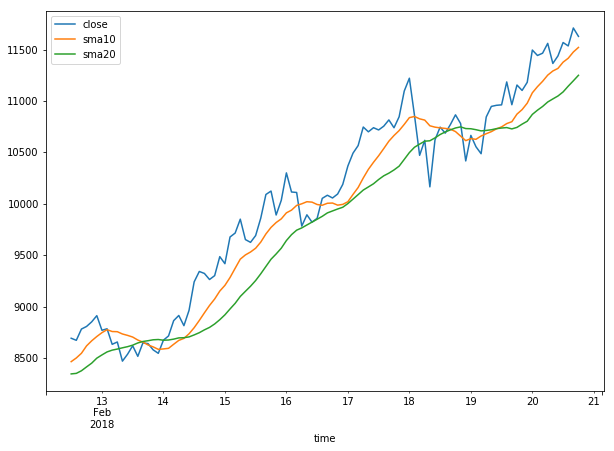

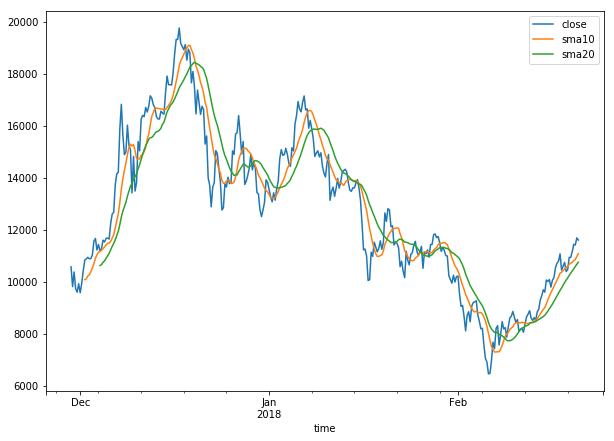

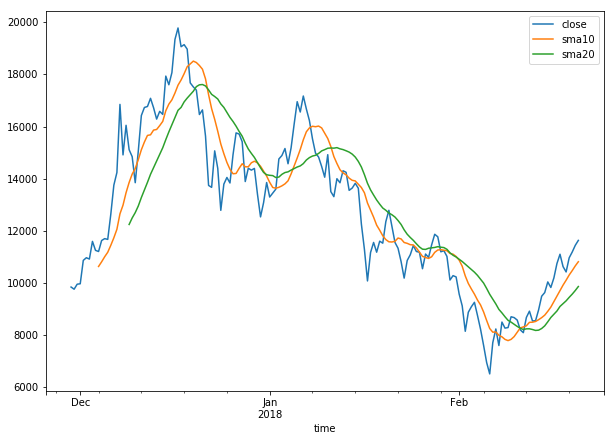

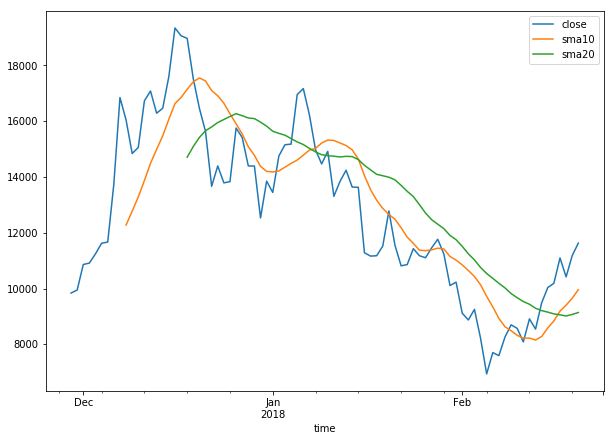

In [21]:
smaplot = btc_intervals_timeIndex
for i in range(len(smaplot)):
    if i == 0:
        smaplot[i] = smaplot[i].tail(100)
        smaplot[i] = smaplot[i][['close', 'sma10', 'sma20']].plot(figsize=[10,7])
    else:
        smaplot[i] = smaplot[i][['close', 'sma10', 'sma20']].plot(figsize=[10,7])

## Sentiment

In [ ]:
import tweepy as twpy
from textblob import TextBlob
consumer_key = 'fba8sGRIIg0EoQOtfgxHGv7EI'
consumer_secret = 'z8LKzW9epwOPWsYfE1QXIApFlo1VrbM6rGP9K7zdr9tXa3TocS'
access_token = '893107128092606465-r9EFEkdoAoQyuHEOSMrQMdvUG7rAOBO'
access_token_sedret = 'ZeGap5yg7GF7WdJ31wG2vb3NxVALCH5PUJj6hsCPPOv5e'
auth = twpy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_sedret)
api = twpy.API(auth)

In [ ]:
users = ['BTCTN', 'kyletorpey', 'hodlhodl', 'bravenewcoin', 'coindesk', 'Cointelegraph']
dates = []
tweets = []
idString = []
userName = []
for i in range(len(users)):
    user = users[i]
    for status in twpy.Cursor(api.user_timeline, screen_name=user ).items(2900):
        dates.append(status.created_at)
        tweets.append(status.text)
        userName.append(status.user.name)

INFO:tweepy.binder:PARAMS: {'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'965649270530543615', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'965346549625737215', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'964894556851449855', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'964464506326970367', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'964032887262769152', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'963527031815331841', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'963186785588301823', 'screen_name': b'BTCTN'}
INFO:tweepy.bind

INFO:tweepy.binder:PARAMS: {'max_id': b'940094131442814980', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'939609672973242367', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'939264606152912897', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'938854030062825473', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'938536909613223935', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'938192550111870975', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'937842762778599423', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'937547284287574015', 'screen_

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'910567003244593151', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'909896093869232128', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'909018830906822655', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'908132973945479167', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'907651452801339391', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'906973083231285254', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'906248305641971711', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PAR

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'956241629148536831', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'956212298103820288', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'956037109210603520', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955911564183457792', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955878693800308735', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955852226739736575', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955602118873927679', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'creat

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'946053894261665791', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945758304445390847', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945693334537932801', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945384475487342592', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'944217507308752895', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943948547300487169', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943920548710617087', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'creat

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934701175936466943', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934408802547453951', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934045363035664384', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'931135816759472127', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'928314825658249215', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'926207006901497855', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'923921601392934911', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
I

INFO:tweepy.binder:PARAMS: {'max_id': b'953598771845201924', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'953296792069664767', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'953005137370501122', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'952743407465779199', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'952390775467159551', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'951997962913304575', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'951667571777994751', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:P

In [ ]:
combinedTweets = pd.DataFrame({
    'dates': dates,
    'tweets': tweets,
    'user': userName
})    
combinedTweets = combinedTweets.sort_values('dates')
combinedTweets.tail()

In [ ]:
combinedTweets['sentiment-polarity'] = combinedTweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
combinedTweets['sentiment-subjectivity'] = combinedTweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)


In [ ]:
#getting last and first date of time periods. 

btc_sentiment = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]


lastDates = []
firstDates = []
for i in range(len(btc_sentiment)):
    last = len(btc_sentiment[i]) - 1
    firstDate = btc_sentiment[i]['time'].iloc[0]
    lastDate =  btc_sentiment[i]['time'].iloc[last]
    lastDates.append(lastDate)
    firstDates.append(firstDate)



In [ ]:
#Tweet are resampled to a 120 min time interval. This may need to be adjusted for each time period. 
timePeriods = ['120Min', '360Min', '720Min', '1440Min']
tweetTimeSentiment = combinedTweets[['dates', 'sentiment-polarity', 'sentiment-subjectivity']]
tweetTimeSentiment['dates'] = pd.to_datetime(tweetTimeSentiment['dates'])
tweetTimeSentimentPeriods = ['tweetTimeSentimentPeriods2hr', 'tweetTimeSentimentPeriods6hr', 'tweetTimeSentimentPeriods12hr', 'tweetTimeSentimentPeriods24hr']



for i in range(len(lastDates)):
    tweetTimeSentimentPeriods[i] = tweetTimeSentiment.resample(rule=timePeriods[i], on='dates').mean()
    tweetTimeSentimentPeriods[i] = tweetTimeSentiment.fillna(0)
    tweetTimeSentiment = tweetTimeSentiment.set_index('dates')
    #mask = (tweetTimeSentiment[i].index > firstDates[i]) & (tweetTimeSentiment[i].index <= lastDates[i])
    #tweetTimeSentimentPeriods[i] = tweetTimeSentimentPeriods[i].iloc[mask]

## Getting Started WIth Backtesting using ZipLine

In [ ]:
from zipline.api import order_target, record, symbol